In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report # for model evaluation metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/its-a-fraud/train.csv
/kaggle/input/its-a-fraud/test.csv
/kaggle/input/its-a-fraud/mock_submission.csv
/kaggle/input/transaction-fruad/Train_without_Data_balancing.csv
/kaggle/input/transaction-fruad/Test_without_Data_balancing.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train=pd.read_csv("../input/transaction-fruad/Train_without_Data_balancing.csv")
train=train.drop(train.columns[0],axis=1)

In [5]:
train.head()

,isFraud,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C3,C5,C13,D1,D4,D10,D15,M6,V12,V14,V15,V17,V19,V23,V24,V25,V26,V27,V29,V35,V37,V38,V39,V41,V42,V44,V46,V47,V48,V53,V55,V56,V59,V61,V62,V65,V66,V67,V68,V75,V77,V78,V80,V82,V83,V86,V87,V88,V89,V95,V98,V99,V100,V104,V107,V108,V109,V110,V111,V112,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V129,V130,V131,V135,V136,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V300,V302,V303,V305,V310,V311,V312,V313,V314,V319,V320,ProductCD_is_H,ProductCD_is_R,ProductCD_is_S,ProductCD_is_W,card4_is_american express,card4_is_discover,card4_is_mastercard,card6_is_charge card,card6_is_credit,card6_is_debit or credit,P_emaildomain_is_aim.com,P_emaildomain_is_anonymous.com,P_emaildomain_is_aol.com,P_emaildomain_is_att.net,P_emaildomain_is_bellsouth.net,P_emaildomain_is_cableone.net,P_emaildomain_is_centurylink.net,P_emaildomain_is_charter.net,P_emaildomain_is_comcast.net,P_emaildomain_is_cox.net,P_emaildomain_is_earthlink.net,P_emaildomain_is_embarqmail.com,P_emaildomain_is_frontier.com,P_emaildomain_is_frontiernet.net,P_emaildomain_is_gmail,P_emaildomain_is_gmail.com,P_emaildomain_is_goodmail,P_emaildomain_is_hotmail.com,P_emaildomain_is_hotmail.es,P_emaildomain_is_hotmail.fr,P_emaildomain_is_icloud.com,P_emaildomain_is_juno.com,P_emaildomain_is_live.com,P_emaildomain_is_live.com.mx,P_emaildomain_is_live.fr,P_emaildomain_is_mac.com,P_emaildomain_is_mail.com,P_emaildomain_is_me.com,P_emaildomain_is_msn.com,P_emaildomain_is_netzero.net,P_emaildomain_is_optonline.net,P_emaildomain_is_outlook.com,P_emaildomain_is_outlook.es,P_emaildomain_is_prodigy.net.mx,P_emaildomain_is_protonmail.com,P_emaildomain_is_q.com,P_emaildomain_is_roadrunner.com,P_emaildomain_is_rocketmail.com,P_emaildomain_is_sbcglobal.net,P_emaildomain_is_sc.rr.com,P_emaildomain_is_suddenlink.net,P_emaildomain_is_verizon.net,P_emaildomain_is_yahoo.com,P_emaildomain_is_yahoo.com.mx,P_emaildomain_is_yahoo.de,P_emaildomain_is_yahoo.es,P_emaildomain_is_yahoo.fr,P_emaildomain_is_ymail.com
0,0.0,49.00,5033,269.0,150.0,224.0,330.0,87.0,2.0,0.0,0.0,21.0,14.0,370.0,14.0,375.0,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,98.0,0.00,0.00,0.00,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,98.0,0.0,0.00,49.00,98.0,0.00,0.00,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,57.95,4527,376.0,150.0,226.0,441.0,87.0,2.0,0.0,1.0,14.0,136.0,136.0,136.0,136.0,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,229.8,0.00,0.00,0.00,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,229.8,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,115.95,2772,512.0,150.0,226.0,143.0,87.0,2.0,0.0,1.0,14.0,193.0,495.0,495.0,495.0,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.00,107.95,107.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,107.95,107.95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,100.00,14290,512.0,150.0,226.0,177.0,87.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0

In [6]:
Train_target_df=train.loc[:,"isFraud"]
train.drop("isFraud",axis=1,inplace=True)

In [7]:
x_train_df=train
y_train_df=Train_target_df

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.20, random_state=0)

### functions

In [9]:
def Evalution(y_test,predictions): 
    score=metrics.accuracy_score(y_test, predictions)
    cm = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    print(classification_report(y_test, predictions))
def AUC(model,x_test,y_test,predictions):
    metrics.plot_roc_curve(model, x_test, y_test) 
    fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions)
    # auc score
    print("AUC score: {}".format(metrics.auc(fpr, tpr)))
def Eval(model,X_over,y_over,x_test,y_test): 
    model.fit(X_over,y_over)
    predictions = model.predict(x_test)
    Evalution(y_test,predictions)
    AUC(model,x_test,y_test,predictions)

## Under Sampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [11]:
print(Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_over, y_over = undersample.fit_resample(x_train, y_train)
print(Counter(y_over))

Counter({0.0: 341979, 1.0: 12345})
Counter({0.0: 24690, 1.0: 12345})


In [12]:
print(Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy="majority")
X_over_m, y_over_m = undersample.fit_resample(x_train, y_train)
print(Counter(y_over_m))

Counter({0.0: 341979, 1.0: 12345})
Counter({0.0: 12345, 1.0: 12345})


### logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     85429
         1.0       0.14      0.26      0.18      3152

    accuracy                           0.92     88581
   macro avg       0.56      0.60      0.57     88581
weighted avg       0.94      0.92      0.93     88581

AUC score: 0.5996917736122251


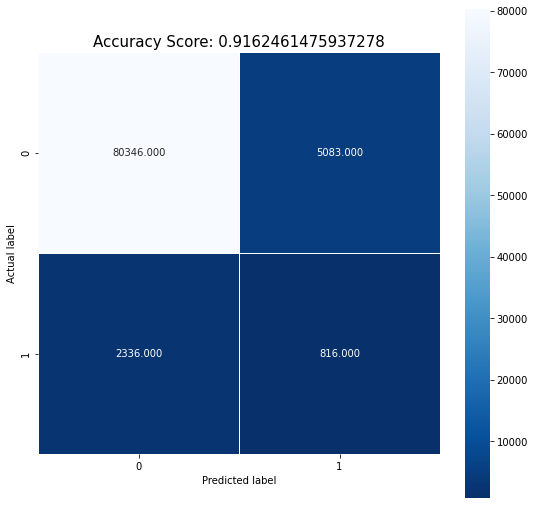

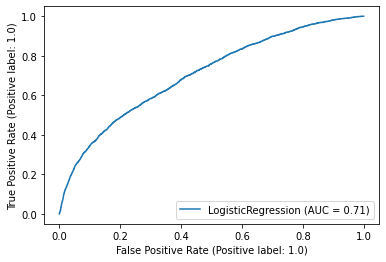

In [14]:
Eval(logisticRegr,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.64      0.77     85429
         1.0       0.06      0.66      0.11      3152

    accuracy                           0.64     88581
   macro avg       0.52      0.65      0.44     88581
weighted avg       0.95      0.64      0.75     88581

AUC score: 0.6475239212210121


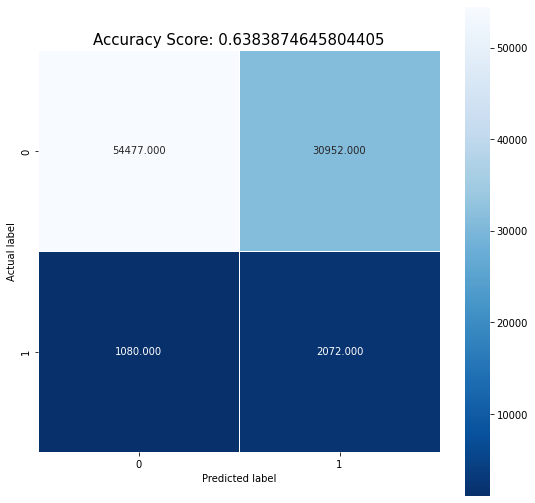

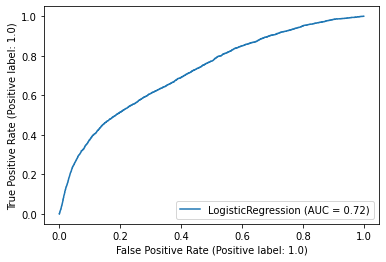

In [15]:
Eval(logisticRegr,X_over_m,y_over_m,x_test,y_test)

### Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     85429
         1.0       0.15      0.38      0.22      3152

    accuracy                           0.90     88581
   macro avg       0.56      0.65      0.58     88581
weighted avg       0.95      0.90      0.92     88581

AUC score: 0.6512228157612165


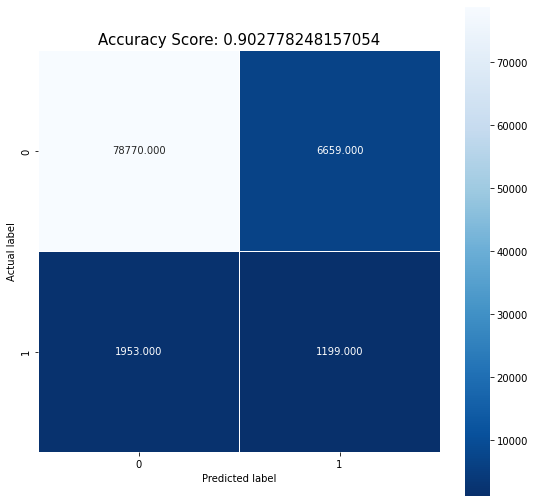

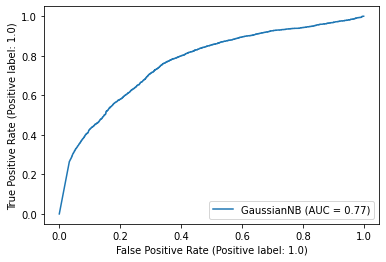

In [17]:
Eval(nb,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     85429
         1.0       0.15      0.38      0.22      3152

    accuracy                           0.90     88581
   macro avg       0.57      0.65      0.58     88581
weighted avg       0.95      0.90      0.92     88581

AUC score: 0.6528248581821708


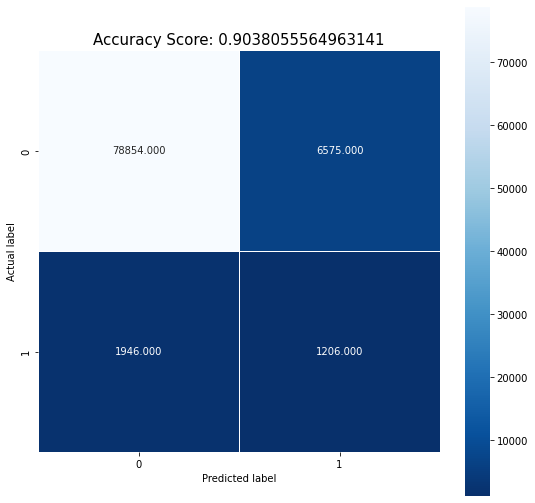

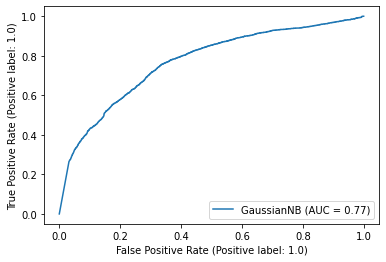

In [18]:
Eval(nb,X_over_m,y_over_m,x_test,y_test)

### RidgeClassifierCV

In [19]:
from sklearn.linear_model import RidgeClassifierCV
pac=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94     85429
         1.0       0.17      0.49      0.25      3152

    accuracy                           0.90     88581
   macro avg       0.57      0.70      0.60     88581
weighted avg       0.95      0.90      0.92     88581

AUC score: 0.6987508306092993


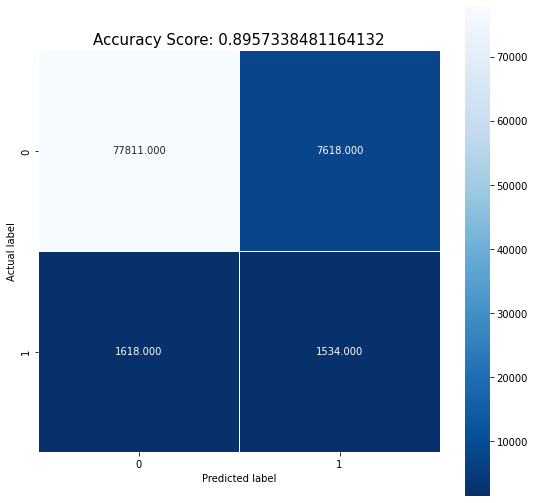

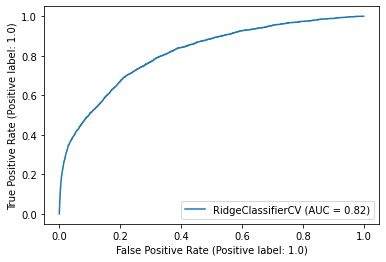

In [20]:
Eval(pac,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     85429
         1.0       0.10      0.72      0.18      3152

    accuracy                           0.76     88581
   macro avg       0.54      0.74      0.52     88581
weighted avg       0.96      0.76      0.83     88581

AUC score: 0.7405592373647413


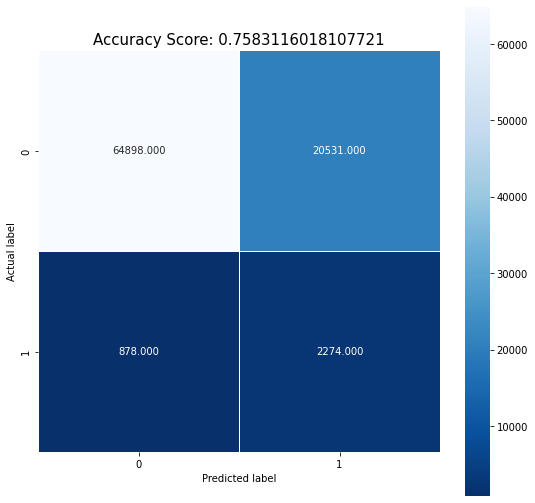

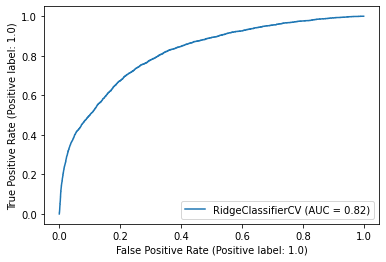

In [21]:
Eval(pac,X_over_m,y_over_m,x_test,y_test)

In [22]:
pac.get_params(deep=True)

{'alphas': array([0.001, 0.01 , 0.1  , 1.   ]),
 'class_weight': None,
 'cv': None,
 'fit_intercept': True,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

### Perceptron

In [23]:
from sklearn.linear_model import Perceptron

In [24]:
per=Perceptron(tol=1e-5)

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94     85429
         1.0       0.11      0.31      0.16      3152

    accuracy                           0.89     88581
   macro avg       0.54      0.61      0.55     88581
weighted avg       0.94      0.89      0.91     88581

AUC score: 0.6091102335373578


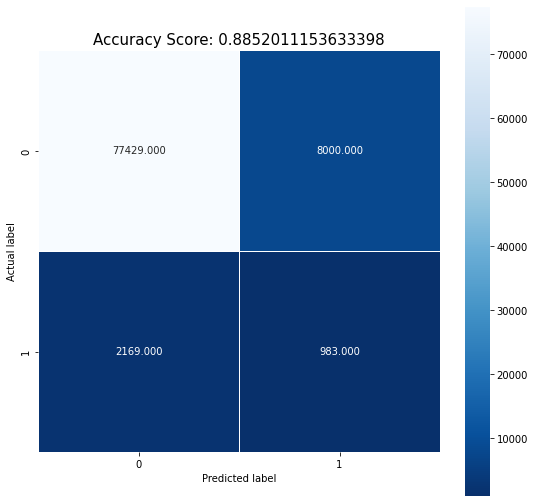

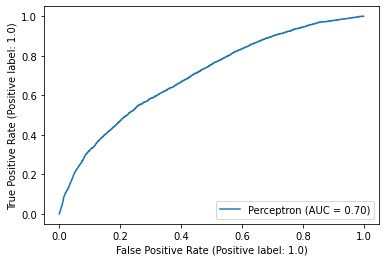

In [25]:
Eval(per,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.65      0.78     85429
         1.0       0.06      0.65      0.12      3152

    accuracy                           0.65     88581
   macro avg       0.52      0.65      0.45     88581
weighted avg       0.95      0.65      0.76     88581

AUC score: 0.6515795569960937


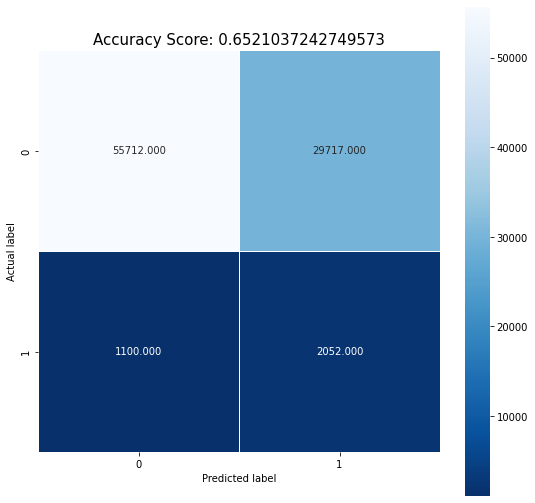

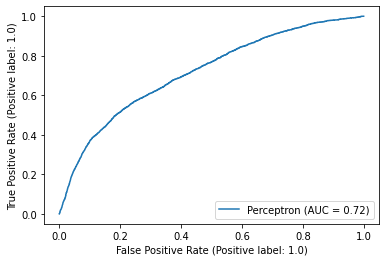

In [26]:
Eval(per,X_over_m,y_over_m,x_test,y_test)

## OverSampling

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
print(Counter(y_train))
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(x_train, y_train)
print(Counter(y_over))

Counter({0.0: 341979, 1.0: 12345})
Counter({0.0: 341979, 1.0: 170989})


In [29]:
print(Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_over_m, y_over_m = oversample.fit_resample(x_train, y_train)
print(Counter(y_over))

Counter({0.0: 341979, 1.0: 12345})
Counter({0.0: 341979, 1.0: 170989})


### logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     85429
         1.0       0.15      0.26      0.19      3152

    accuracy                           0.92     88581
   macro avg       0.56      0.60      0.57     88581
weighted avg       0.94      0.92      0.93     88581

AUC score: 0.6005864686191454


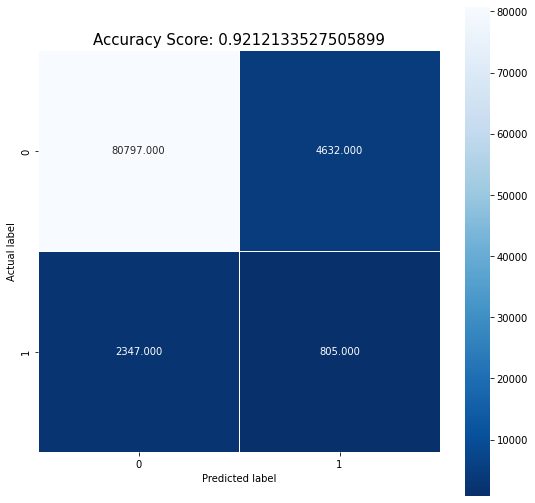

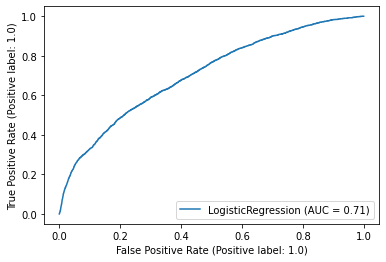

In [31]:
Eval(logisticRegr,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.74     85429
         1.0       0.06      0.69      0.11      3152

    accuracy                           0.60     88581
   macro avg       0.52      0.64      0.43     88581
weighted avg       0.95      0.60      0.72     88581

AUC score: 0.6446316156771739


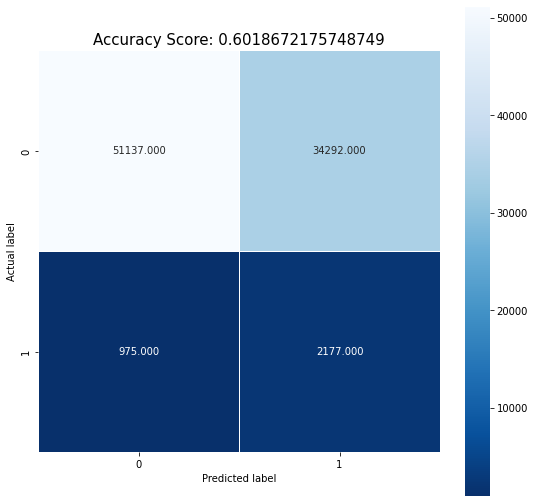

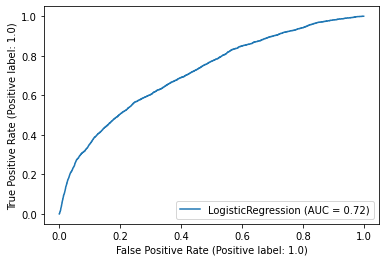

In [32]:
Eval(logisticRegr,X_over_m,y_over_m,x_test,y_test)

### Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     85429
         1.0       0.15      0.37      0.22      3152

    accuracy                           0.90     88581
   macro avg       0.57      0.65      0.58     88581
weighted avg       0.95      0.90      0.92     88581

AUC score: 0.6491265411245114


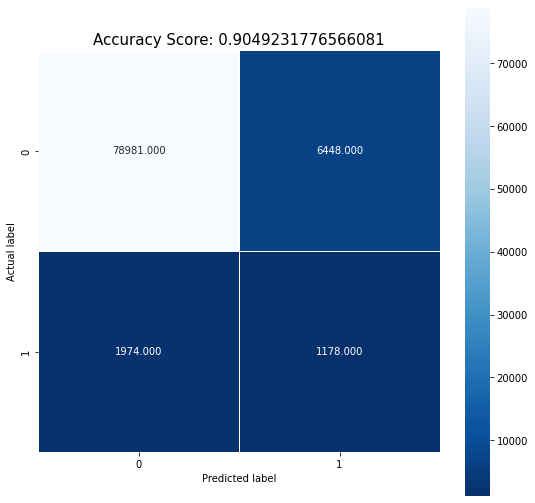

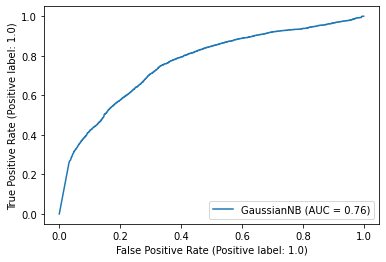

In [34]:
Eval(nb,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     85429
         1.0       0.15      0.38      0.22      3152

    accuracy                           0.90     88581
   macro avg       0.56      0.65      0.58     88581
weighted avg       0.95      0.90      0.92     88581

AUC score: 0.6508991005859766


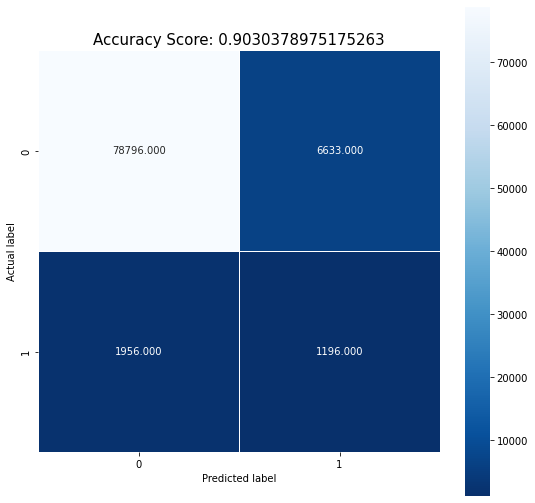

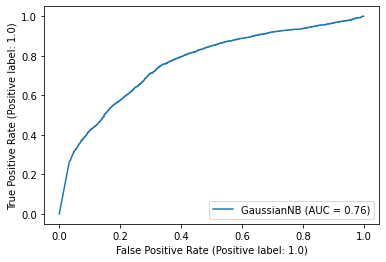

In [35]:
Eval(nb,X_over_m,y_over_m,x_test,y_test)

### RidgeClassifierCV

In [36]:
from sklearn.linear_model import RidgeClassifierCV
pac=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.94     85429
         1.0       0.17      0.48      0.25      3152

    accuracy                           0.90     88581
   macro avg       0.57      0.70      0.60     88581
weighted avg       0.95      0.90      0.92     88581

AUC score: 0.6972107552220911


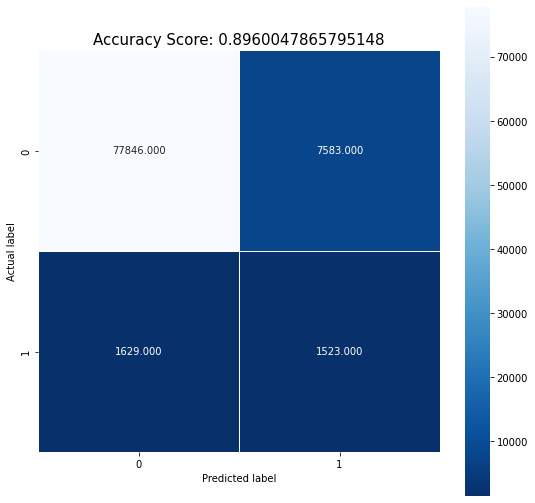

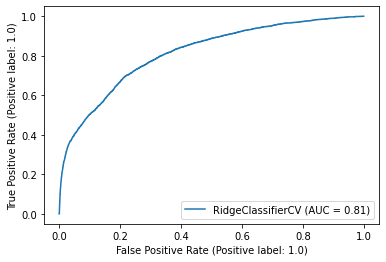

In [37]:
Eval(pac,X_over,y_over,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86     85429
         1.0       0.10      0.72      0.18      3152

    accuracy                           0.76     88581
   macro avg       0.54      0.74      0.52     88581
weighted avg       0.96      0.76      0.84     88581

AUC score: 0.7404555151863277


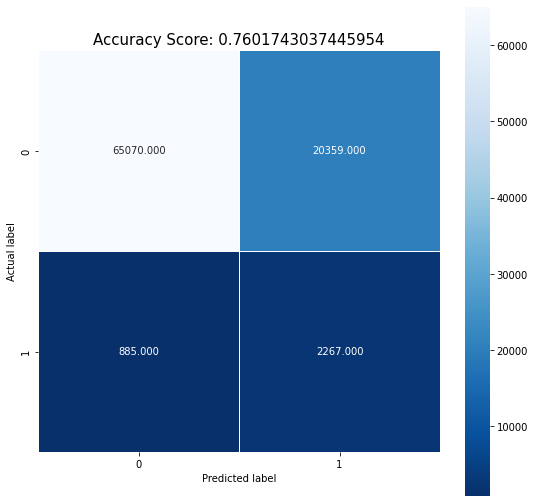

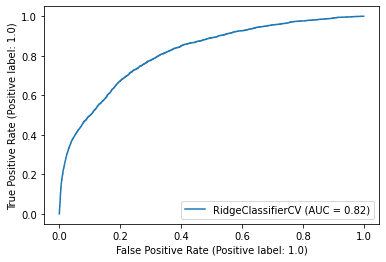

In [38]:
Eval(pac,X_over_m,y_over_m,x_test,y_test)

In [39]:
from sklearn.linear_model import Perceptron
per=Perceptron(tol=1e-5)

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     85429
         1.0       0.15      0.40      0.22      3152

    accuracy                           0.90     88581
   macro avg       0.57      0.66      0.58     88581
weighted avg       0.95      0.90      0.92     88581

AUC score: 0.660936320988611


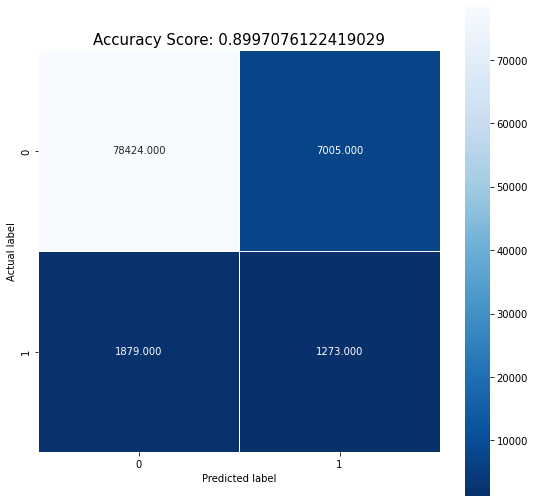

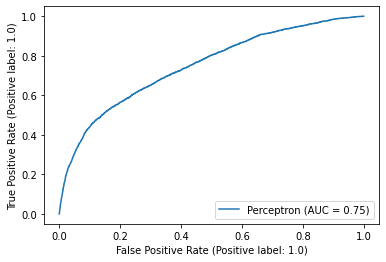

In [40]:
Eval(per,X_over_m,y_over_m,x_test,y_test)

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     85429
         1.0       0.17      0.16      0.17      3152

    accuracy                           0.94     88581
   macro avg       0.57      0.57      0.57     88581
weighted avg       0.94      0.94      0.94     88581

AUC score: 0.5668046050263011


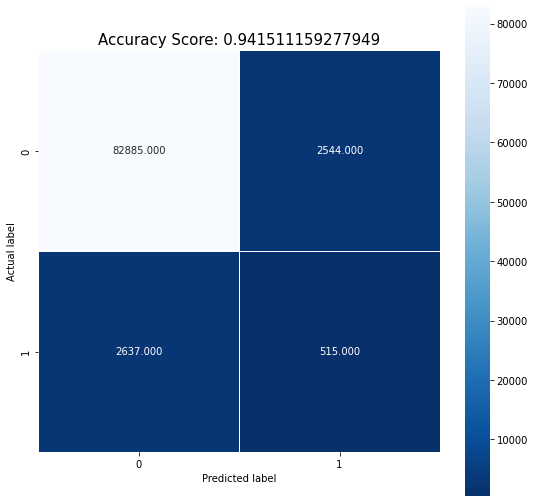

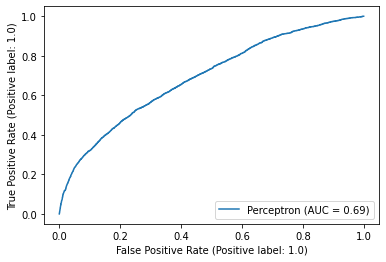

In [41]:
Eval(per,X_over,y_over,x_test,y_test)

## SMOTE  Algorithm:
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
print(Counter(y_train))
sm = SMOTE()
X_over_sm, y_over_sm = sm.fit_resample(x_train, y_train)
print(Counter(y_over))

Counter({0.0: 341979, 1.0: 12345})
Counter({0.0: 341979, 1.0: 170989})


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

              precision    recall  f1-score   support

         0.0       0.98      0.61      0.75     85429
         1.0       0.06      0.68      0.11      3152

    accuracy                           0.61     88581
   macro avg       0.52      0.64      0.43     88581
weighted avg       0.95      0.61      0.73     88581

AUC score: 0.6407767191480823


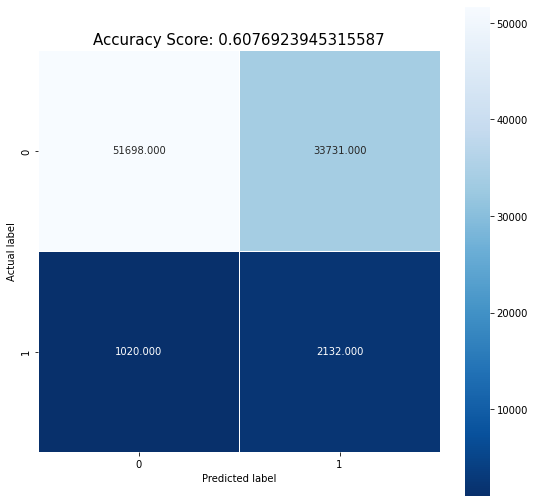

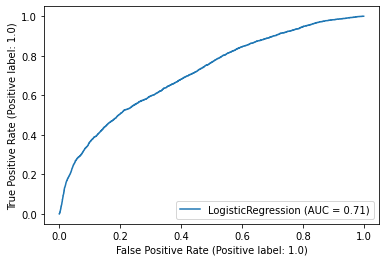

In [45]:
Eval(logisticRegr,X_over_sm,y_over_sm,x_test,y_test)

### Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB
nb =GaussianNB()

              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92     85429
         1.0       0.11      0.46      0.18      3152

    accuracy                           0.85     88581
   macro avg       0.55      0.66      0.55     88581
weighted avg       0.95      0.85      0.89     88581

AUC score: 0.663558639516188


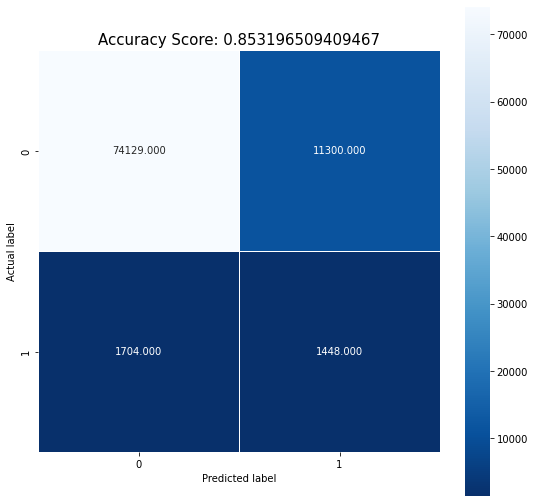

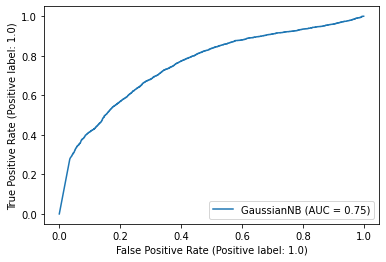

In [47]:
Eval(nb,X_over_sm,y_over_sm,x_test,y_test)

### RidgeClassifierCV

In [48]:
from sklearn.linear_model import RidgeClassifierCV
pac=RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95     85429
         1.0       0.18      0.39      0.24      3152

    accuracy                           0.91     88581
   macro avg       0.58      0.66      0.60     88581
weighted avg       0.95      0.91      0.93     88581

AUC score: 0.662611911660783


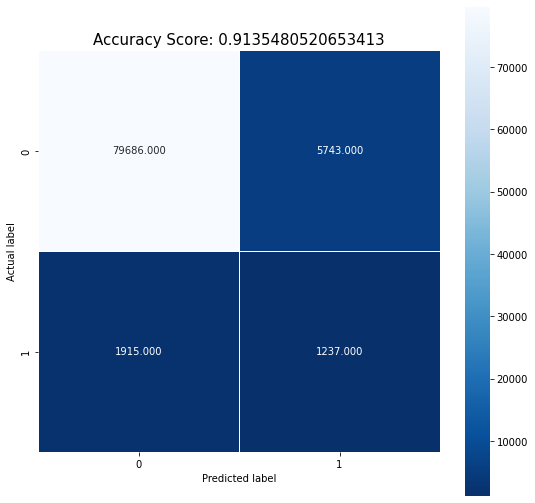

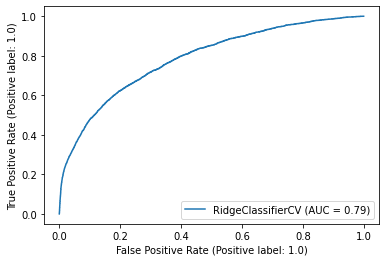

In [49]:
Eval(pac,X_over_sm,y_over_sm,x_test,y_test)

In [50]:
from sklearn.linear_model import Perceptron
per=Perceptron(tol=1e-5)

              precision    recall  f1-score   support

         0.0       0.99      0.51      0.67     85429
         1.0       0.06      0.83      0.11      3152

    accuracy                           0.52     88581
   macro avg       0.52      0.67      0.39     88581
weighted avg       0.95      0.52      0.65     88581

AUC score: 0.6674333134298063


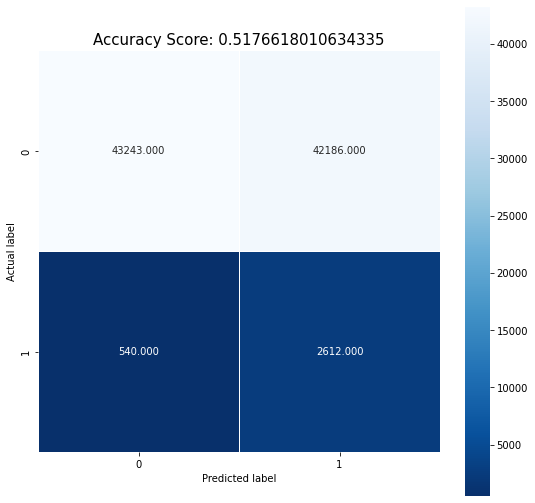

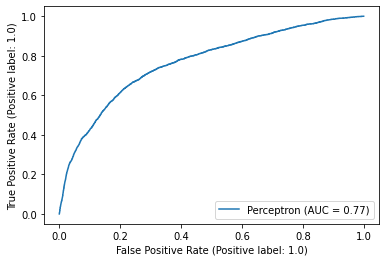

In [51]:
Eval(per,X_over_sm,y_over_sm,x_test,y_test)